In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline



In [2]:
df = pd.read_csv('E:\Data Sciense\DataSet\FuelConsumption.csv')

df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


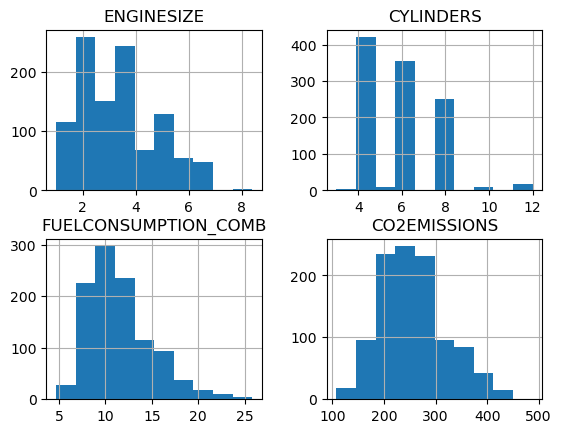

In [5]:
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

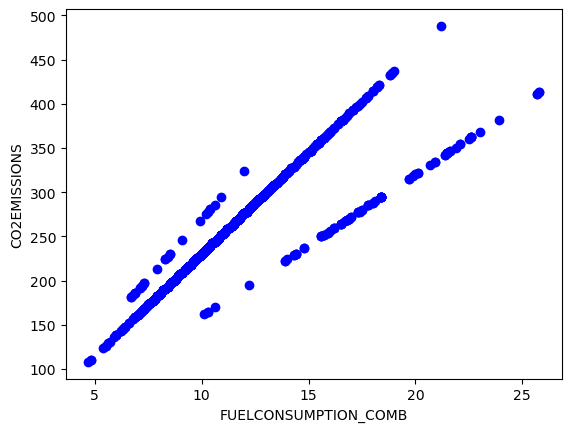

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

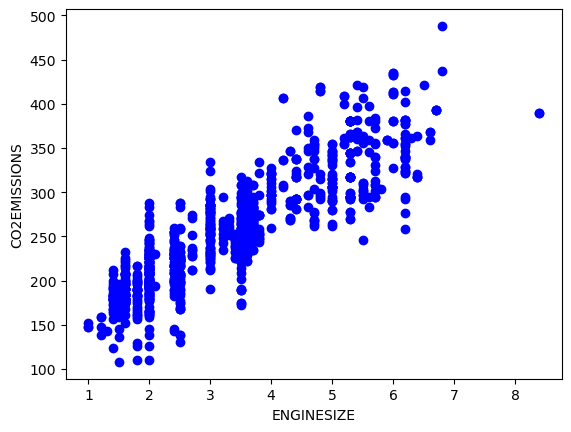

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]

test = cdf[~msk]

train.head()




,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230


In [9]:
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
9,2.4,4,9.2,212
13,5.9,12,15.6,359
14,4.7,8,14.7,338
15,4.7,8,15.4,354


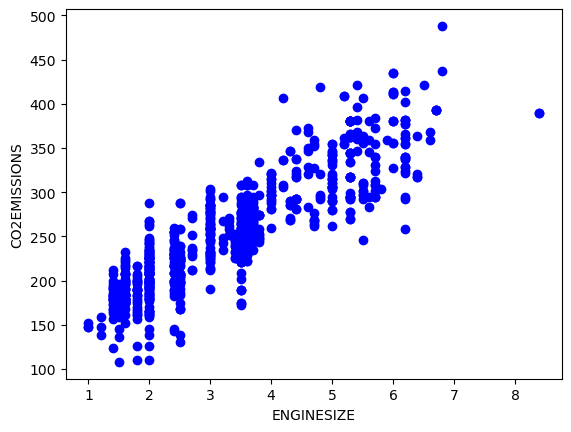

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

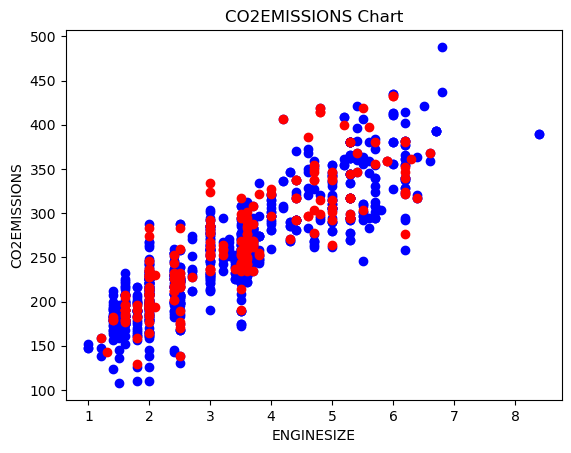

In [11]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue') 

ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'red') 

ax1.set_title('CO2EMISSIONS Chart')

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [12]:

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
                           
train_y = np.asanyarray(train[['CO2EMISSIONS']])
                           
regr.fit(train_x, train_y)
                           
print('Coeffitionts : ',  regr.coef_)
                           
print('Intercept : ',  regr.intercept_)



Coeffitionts :  [[38.81025932]]
Intercept :  [125.16943619]


Text(0.5, 1.0, 'Co2 Emession')

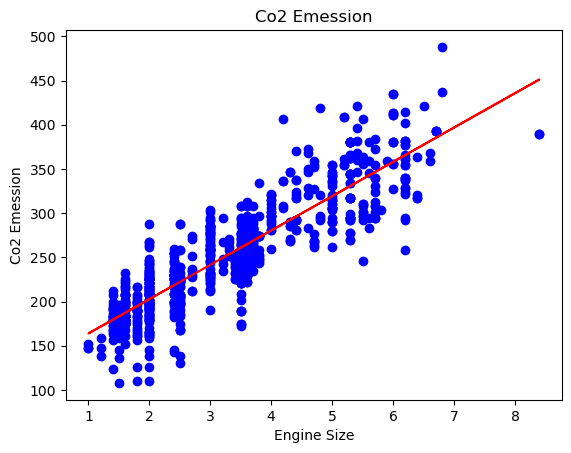

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')

plt.plot(train_x, (regr.coef_ * train_x) + regr.intercept_, '-r')

plt.xlabel('Engine Size')

plt.ylabel('Co2 Emession')

plt.title('Co2 Emession')

In [14]:
test_x = np.asanyarray(test[['ENGINESIZE']])
                           
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#print(test_y)

predict_y = regr.predict(test_x)

#print(predict_y)

print("mean absolute error : %.2f " % np.mean(np.absolute(test_y - predict_y)))

print("R2Score : %.2f" % r2_score(test_y, predict_y))


mean absolute error : 23.76 
R2Score : 0.73


In [15]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [16]:
msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]

test = cdf[~msk]

train.head()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [17]:
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
                           
train_y = np.asanyarray(train[['CO2EMISSIONS']])
                           
regr.fit(train_x, train_y)
                           
print('Coeffitionts : ',  regr.coef_)
                           
print('Intercept : ',  regr.intercept_)


Coeffitionts :  [[11.81111187  7.0246261   9.68534573]]
Intercept :  [63.92991236]


In [18]:
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
                           
test_y = np.asanyarray(test[['CO2EMISSIONS']])

#print(test_y)

predict_y = regr.predict(test_x)

#print(predict_y)

print("residual sum of square : %.2f " % np.mean(np.absolute(predict_y - test_y)**2))

print("variance score : %.2f" % regr.score(test_x, test_y))

residual sum of square : 541.41 
variance score : 0.84


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 2)

train_x_poly = poly.fit_transform(train_x)

train_x_poly




array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ]])

In [20]:
clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

print( 'Coefficient : ', clf.coef_)

print('Intercept : ', clf.intercept_)


Coefficient :  [[ 0.         49.87986617 -1.31066544]]
Intercept :  [106.88999439]


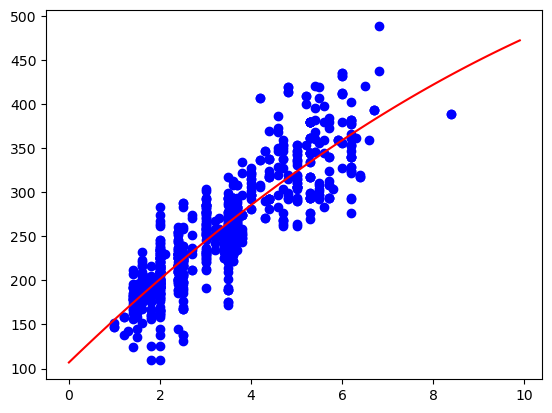

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')

XX = np.arange(0.0, 10.0, 0.1)

yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r')


In [24]:
test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

print('Mean absolut error : %.2f' % np.mean(np.absolute(test_y_ - test_y)))

print('Residual sum of square  : %.2f' % np.mean((test_y_ - test_y )**2))

print('R2_Score : %.2f' % r2_score(test_y, test_y_))

Mean absolut error : 22.55
Residual sum of square  : 845.98
R2_Score : 0.74
